## Wprowadzenie
Skrypt pokazuje jak użyć pakietu SciKit do klasyfikacji danych. Rozważane są dwa przykłady:  zestaw danych IRIS oraz zestaw danych TITANIC  (do ściągnięcia z https://www.kaggle.com/c/titanic, dokładniej: potrzebny jest  plik https://www.kaggle.com/c/titanic/download/train.csv).

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics

from sklearn import tree

## 1. Pierwszy zestaw danych
Dane IRIS

In [2]:
# wczytanie zestawu danych
from sklearn import datasets
iris = datasets.load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [3]:
# rozbicie zestawu danych na dane opisujące kwiat (X) i etykietę klasy (y)
y = data['species']
X = data.drop('species', axis = 1)

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

In [4]:
# zapisanie drzewa klasyfikacyjnego do pliku .dot
# plik ten można przekształcić do pliku .pdf za pomocą programu graphviz używając polecenia:
#   dot -Tpdf iris.dot -o iris.pdf

with open("iris.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=X.columns)

In [5]:
# ocena stworzonego klasyfikatora na danych uczących
t.score(X, y)

1.0

1.0
0.9574468085106383


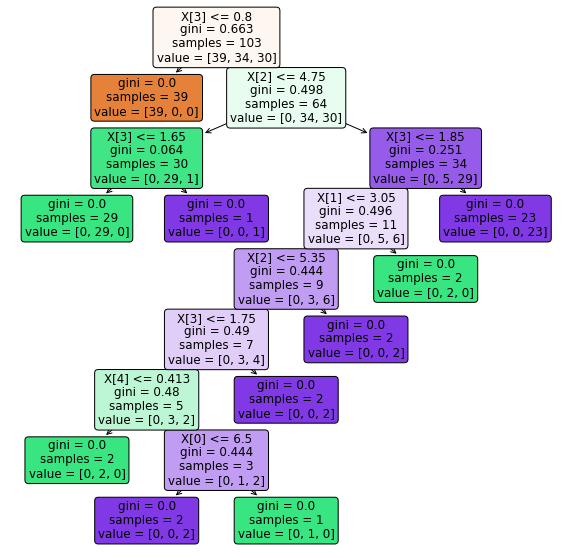

In [6]:
# Uczciwiej byłoby oceniać klasyfikator na danych, które nie były używane podczas tworzenia
# klasyfikatora. Dlatego cały zestaw danych warto podzielić na dwie części: dane uczące i dane
# testowe.

data['train'] = np.random.uniform(0, 1, len(data))

data_train = data[data['train'] <= 0.65]
data_test = data[data['train'] > 0.65]

y = data_train['species']
X = data_train.drop('species', axis = 1)

t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

print (t.score(X, y))

y = data_test['species']
X = data_test.drop('species', axis = 1)

print (t.score(X, y))
plt.gcf().set_size_inches(10,10)
tree.plot_tree(t,filled=True,rounded=True)
plt.show()

## 2. Drugi zestaw danych
Dane TITANIC (do ściągnięcia z https://www.kaggle.com/c/titanic, dokładniej: potrzebny jest  plik https://www.kaggle.com/c/titanic/download/train.csv).

In [7]:
# wczytanie zestawu danych z pliku
data = pd.read_csv("Titanic/train.csv")
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
# usunięcie z zestawu danych atrybutów nieistotnych dla klasyfikacji
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
data = data.dropna()
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [9]:
# zmiana kodowania atrybutów nominalnych w zestawie danych
data['Sex'] = pd.Categorical(data['Sex']).codes
data['Embarked'] = pd.Categorical(data['Embarked']).codes
data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

In [10]:
# rozbicie zestawu danych na dane opisujące pasażera (X) i etykietę klasy (y)
y = data['Survived']
X = data.drop('Survived', axis = 1)

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

In [11]:
# zapisanie drzewa klasyfikacyjnego do pliku .dot
# plik ten można przekształcić do pliku .pdf za pomocą programu graphviz używając polecenia:
#   dot -Tpdf titanic.dot -o titanic.pdf

with open("titanic-gini.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=X.columns,filled=True,rounded=True)

In [12]:
# ocena stworzonego klasyfikatora na danych uczących
t.score(X, y)

0.9859550561797753

In [13]:
# Uczciwiej byłoby oceniać klasyfikator na danych, które nie były używane podczas tworzenia
# klasyfikatora. Dlatego cały zestaw danych warto podzielić na dwie części: dane uczące i dane
# testowe (lista 5 zadanie 2b).

In [14]:
#plt.figure()
#plt.gcf().set_size_inches(256,256)
#tree.plot_tree(t, rounded=True, filled=True)
#plt.savefig("Drzewo-gin.png")

In [15]:
# rozbicie zestawu danych na dane opisujące pasażera (X) i etykietę klasy (y)
y = data['Survived']
X = data.drop('Survived', axis = 1)

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier(criterion='entropy')
t = t.fit(X, y)

In [16]:
# zapisanie drzewa klasyfikacyjnego do pliku .dot
# plik ten można przekształcić do pliku .pdf za pomocą programu graphviz używając polecenia:
#   dot -Tpdf titanic.dot -o titanic.pdf

with open("titanic-entr.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=X.columns,filled=True,rounded=True)

In [17]:
# ocena stworzonego klasyfikatora na danych uczących
t.score(X, y)

0.9859550561797753

In [19]:
#plt.figure()
#plt.gcf().set_size_inches(256,256)
#tree.plot_tree(t, rounded=True, filled=True)
#plt.savefig("Drzewo-entr.png")

## Podpunkt b

In [55]:
def obliczPoprawnosc(konfM):
    wszystkie=np.sum(konfM)
    bledy=np.sum(konfM-np.diag(np.diag(konfM)))
    return (wszystkie-bledy)/wszystkie

In [78]:
def testujKlasyfikator(proby,dane, klasyfikacja, frakcja=0.66, K=5,glebokosc=None, liscie=1):
    typowKlas=np.size(np.unique(klasyfikacja))
    uczaceM=np.zeros((typowKlas,typowKlas))
    konfM=np.zeros((typowKlas,typowKlas))
    for i in range(proby):
        losowanie=np.random.uniform(0,1,np.size(klasyfikacja))
        
        uczacePomiary=dane[losowanie<frakcja,:]
        uczaceKlasy=klasyfikacja[losowanie<frakcja]

        testowePomiary=dane[losowanie>=frakcja,:]
        testoweKlasy=klasyfikacja[losowanie>=frakcja]
        
        t=tree.DecisionTreeClassifier(max_depth=glebokosc, max_leaf_nodes=liscie)
        t.fit(uczacePomiary,uczaceKlasy)
        
        klasyfikacjaOtrzymana=t.predict(uczacePomiary)
        uczaceM+=metrics.confusion_matrix(uczaceKlasy,klasyfikacjaOtrzymana)

        klasyfikacjaOtrzymana=t.predict(testowePomiary)
        konfM+=metrics.confusion_matrix(testoweKlasy,klasyfikacjaOtrzymana)
    return (konfM/proby,uczaceM/proby)

In [69]:
klasyfikacja = data['Survived'].__array__()
daneTitanic = data.drop('Survived', axis = 1).__array__()

In [75]:
m=testujKlasyfikator(100,daneTitanic,klasyfikacja)
print(m[0])
print(m[1])
print(obliczPoprawnosc(m[0]))

[[114.83  30.08]
 [ 29.7   68.59]]
[[279.09   0.  ]
 [  4.8  184.91]]
0.7541940789473685


## Podpunkt c

In [77]:
m=testujKlasyfikator(100,daneTitanic,klasyfikacja,glebokosc=3)
print(m[0])
print(m[1])
print(obliczPoprawnosc(m[0]))

[[126.7   17.86]
 [ 31.47  67.42]]
[[249.8   29.64]
 [ 52.02 137.09]]
0.7973711234339701


## Podpunkt d

In [82]:
lista=[]
for i in range(2,30):
    for j in range(1,10):
        m=testujKlasyfikator(100,daneTitanic,klasyfikacja,glebokosc=j, liscie=i)
        lista.append((obliczPoprawnosc(m[0]),i,j))

In [86]:
lista.sort()
lista[-3:]

[(0.806342529588849, 7, 3),
 (0.8063671501600099, 15, 9),
 (0.8067105208721195, 22, 9)]

## Podpunkt e

In [95]:
def crossVal(czesci,dane,klasyfikacja, K=5,proby=10,liscie=None, glebokosc=None):
    etykiety=np.unique(klasyfikacja)
    typowKlas=np.size(etykiety)
    konfM=np.zeros((typowKlas,typowKlas))

    for i in range(proby):
        losowanie=np.random.uniform(0,1,np.size(klasyfikacja))

        for j in range(1,czesci):
            losowanie=np.where(losowanie<j/czesci, j, losowanie)
        losowanie=np.where(losowanie<1,czesci,losowanie)
        losowanie-=1
        
        for j in range(czesci):
            uczacePomiary=dane[losowanie!=j,:]
            uczaceKlasy=klasyfikacja[losowanie!=j]

            testowePomiary=dane[losowanie==j,:]
            testoweKlasy=klasyfikacja[losowanie==j]

            t=tree.DecisionTreeClassifier(max_depth=glebokosc, max_leaf_nodes=liscie)
            t.fit(uczacePomiary,uczaceKlasy)
            klasyfikacjaOtrzymana=t.predict(testowePomiary)

            konfM+=metrics.confusion_matrix(testoweKlasy,klasyfikacjaOtrzymana,labels=etykiety)
    return konfM/(proby*czesci)

In [98]:
lista=[]
for i in range(2,30):
    for j in range(1,10):
        m=crossVal(10,daneTitanic,klasyfikacja,proby=100,glebokosc=j,liscie=i)
        lista.append((obliczPoprawnosc(m[0]),i,j))
lista.sort()
print(lista[-3:])

[(1.0, 29, 7), (1.0, 29, 8), (1.0, 29, 9)]
